<a href="https://colab.research.google.com/github/Shaghayegh-Aflatounian/Race.Discrimination.Task/blob/main/Race_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import os
from google.colab import drive

# Mount Google Drive
drive.mount('/content/gdrive')

df = pd.read_csv('/content/gdrive/My Drive/Github/Race.Discrimination.Task/RA_21_22.csv')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
def weighted_median(data, weights):
    combined = pd.DataFrame({'data': data, 'weights': weights})
    combined_sorted = combined.sort_values(by='data')
    cumsum = combined_sorted['weights'].cumsum()
    cutoff = cumsum.iloc[-1] / 2.0
    return combined_sorted['data'][cumsum >= cutoff].iloc[0]

In [ ]:
df['wealth'] = df.asset_total-df.debt_total

In [ ]:
df['race_education'] = df.race+'-'+df.education

###Q1: Please summarize key trends in median wealth over the last 30 years by race and education using plots and in writing.


### Ans Q1: Summerize trends in median wealth over last 30 years by race & education
- The data shows that white people with a college degree have the highest median wealth.

- The second highest median wealth belongs to other/mixed race people with a college degree, indicating that education is also a major contributing factor to wealth accumulation, after race.

- Hispanics with a college degree have the third highest median wealth.

Overall, the trends reveal that race continues to be a significant determinant of median wealth levels over time. However, obtaining a college education also provides benefits, as households with a degree consistently exhibited higher median wealth than those without, within the same racial groups.

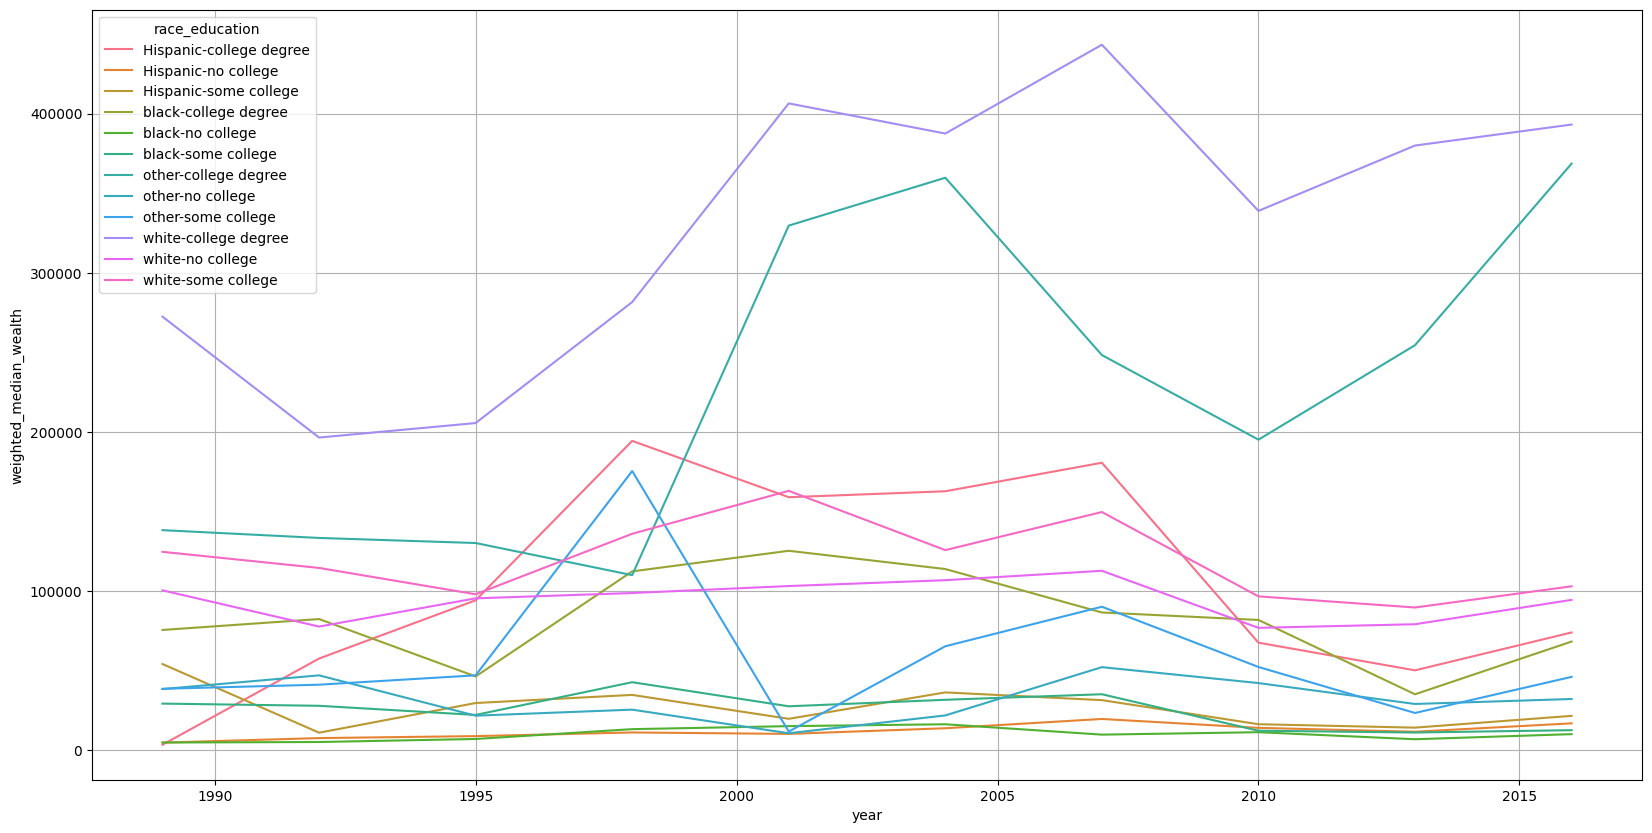

In [ ]:
#Q1
df_q1 = df.groupby(['year', 'race_education']).apply(lambda x: weighted_median(x['wealth'], x['weight'])).reset_index(name='weighted_median_wealth')
plt.figure(figsize = (20,10))
sns.lineplot(data=df_q1, x='year', hue='race_education', y='weighted_median_wealth')
plt.grid()

#### Ans Q1: following graph focus on results after 2010. shows academic education is paving the gap between races white and othera.

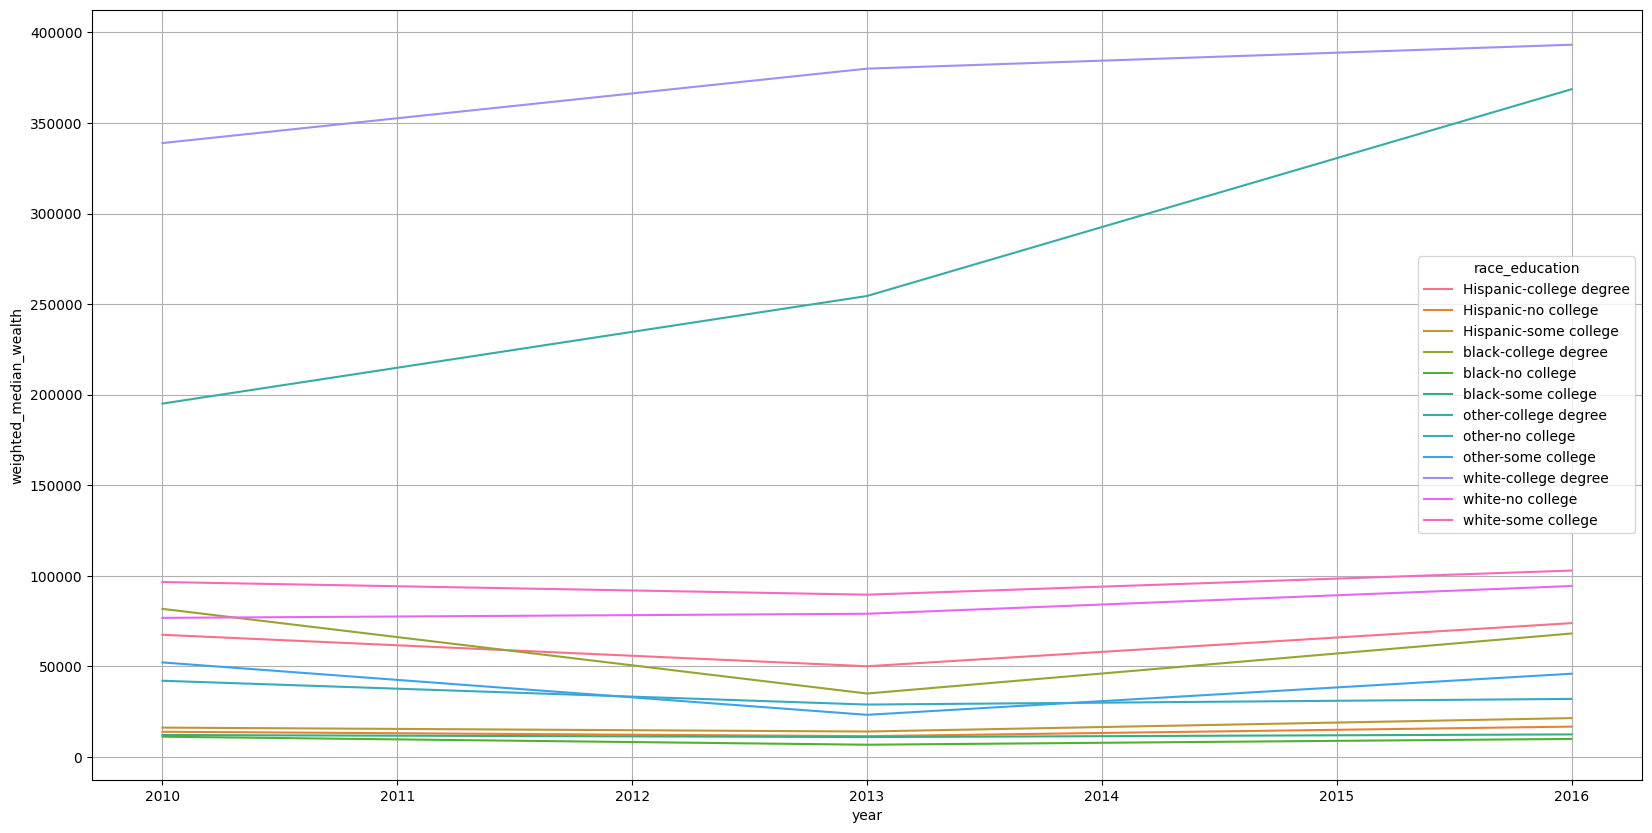

In [ ]:
#Q1
df_q1 = df[df.year>2009].groupby(['year', 'race_education']).apply(lambda x: weighted_median(x['wealth'], x['weight'])).reset_index(name='weighted_median_wealth')
plt.figure(figsize = (20,10))
sns.lineplot(data=df_q1, x='year', hue='race_education', y='weighted_median_wealth')
plt.grid()

####Ans Q1: In continuation of the previous answer, the following graphs analyze the median income by race. The races are listed in order of privilege:

- White
- Other (Asian, African, etc.)
- Hispanic
- Black

The graph clearly shows a significant gap between the income levels of White individuals and those belonging to the Other category. However, it is worth noting that after the year 2010, the importance of race as a determining factor in income disparity seems to have decreased. This indicates a paradigm shift in the relationship between racism and wealth.

Both Black and Hispanic individuals are consistently found to be the least privileged in terms of their wealth, and their income trends have remained relatively stagnant over a period of 30 years.

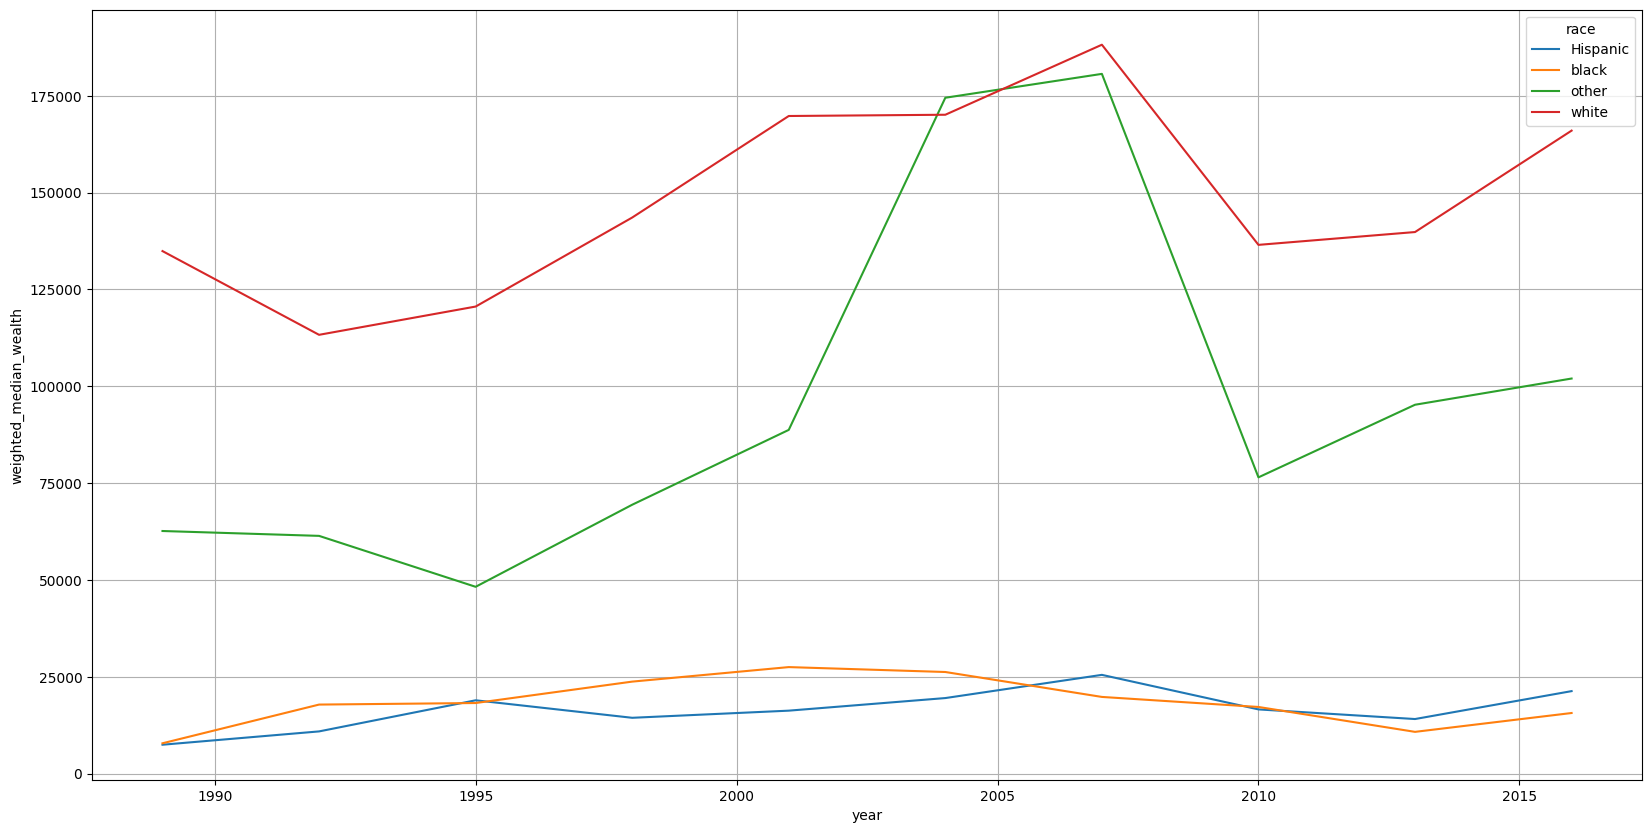

In [ ]:
#Q1
df_q1 = df.groupby(['year', 'race']).apply(lambda x: weighted_median(x['wealth'], x['weight'])).reset_index(name='weighted_median_wealth')
plt.figure(figsize = (20,10))
sns.lineplot(data=df_q1, x='year', hue='race', y='weighted_median_wealth')
plt.grid()

#### Ans Q1: In continuation of the previous answer, the following graphs analyze the median income solely based on education. The findings indicate that individuals with a degree have a significant privilege in terms of their wealth. The data clearly shows a notable disparity between the income levels of degree holders compared to those with lower levels of education.

Furthermore, the graphs reveal that there is not a substantial difference in the wealth of individuals with some level of education, but without a degree. This suggests that the acquisition of a degree plays a crucial role in attaining higher income levels and enjoying greater financial advantages.

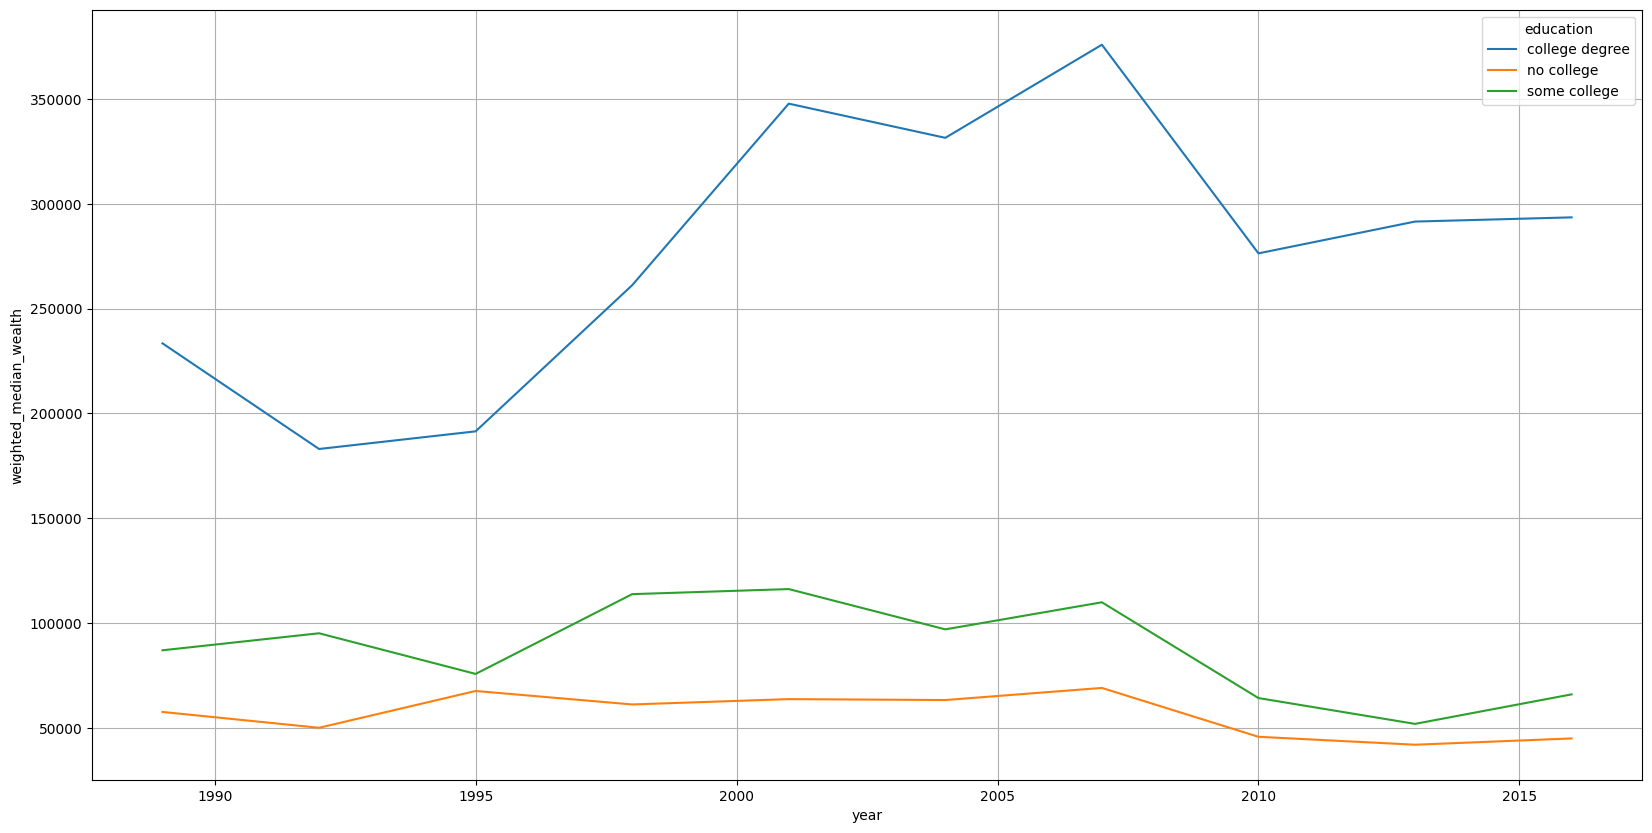

In [ ]:
#Q1
df_q1 = df.groupby(['year', 'education']).apply(lambda x: weighted_median(x['wealth'], x['weight'])).reset_index(name='weighted_median_wealth')
plt.figure(figsize = (20,10))
sns.lineplot(data=df_q1, x='year', hue='education', y='weighted_median_wealth')
plt.grid()

#### Q2: Repeat your analysis for just housing wealth for black and white households.


###Ans Q2:  Answering Question 2 focuses on comparing two races, namely Black and White, while excluding others. The chart presented illustrates the trends in housing wealth, calculated by subtracting the housing debt from the value of the assets. The baseline for housing wealth is measured at 0.

For White individuals, the chart reveals a decline in housing wealth between 2005 and 2010. This decline could be attributed to various factors, such as the impact of a recession (X), changes in the presidency (Y), or other significant events (Z)."

- The burst of the housing bubble: The United States experienced a housing market bubble that peaked around 2006 and subsequently burst, leading to a significant decline in housing prices and overall housing market instability during that period.

- Transition from President George W. Bush to President Barack Obama: President Obama took office in January 2009, during a time when the country was still dealing with the aftermath of the financial crisis, which had a substantial impact on the housing market.

- The subprime mortgage crisis: The United States faced a severe subprime mortgage crisis starting around 2007, which led to a wave of foreclosures and a significant decline in property values. This crisis had a profound impact on the overall housing market and could have contributed to the decline in housing wealth during that period.


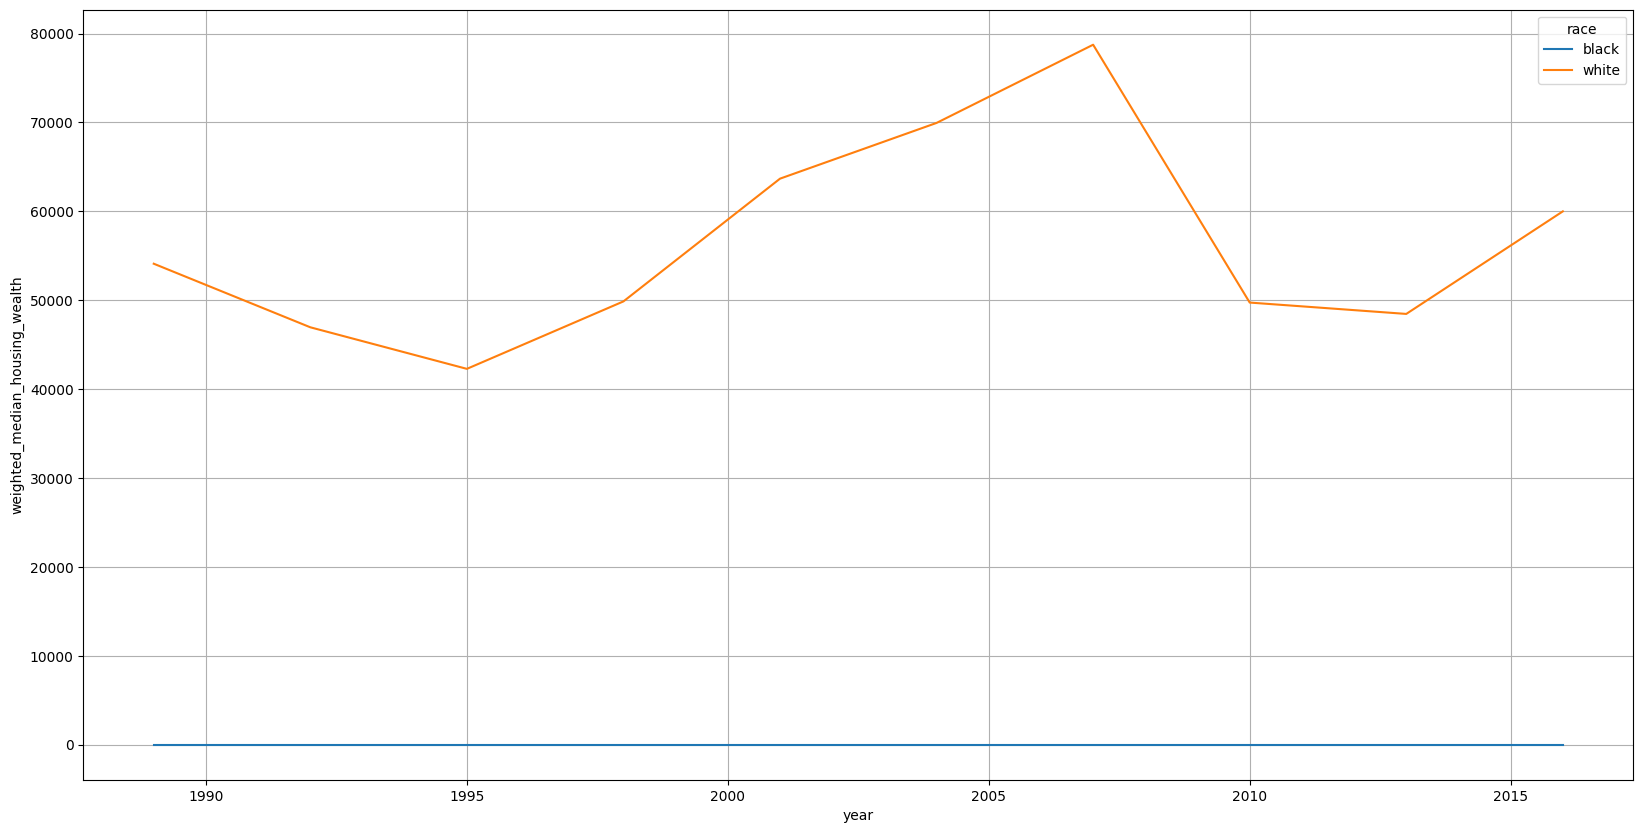

In [ ]:
#Q2
df['housing_wealth'] = df.asset_housing - df.debt_housing
df_q1 = df[(df.race=='black')|(df.race=='white')].groupby(['year', 'race']).apply(lambda x: weighted_median(x['housing_wealth'], x['weight'])).reset_index(name='weighted_median_housing_wealth')
plt.figure(figsize = (20,10))
sns.lineplot(data=df_q1, x='year', hue='race', y='weighted_median_housing_wealth')
plt.grid()

In [ ]:
df['isHomeOWner'] = df.asset_housing.apply(lambda x:True if(x>0) else False)

#### Q3 : Many households are not homeowners and so your analysis for the prior question includes many zeros for housing wealth. Let's dig deeper by focusing just on homeowners age 25 or older. Please summarize trends in for black and white households for both housing and non-housing wealth. Which group had the largest loss in housing wealth, where 2007 is defined as the base period? Please answer this question both in dollar terms and in proportional terms.

#### Ans Q3: Answering Question 3 involves adding specific conditions to the analysis. Firstly, we include an age condition, focusing on individuals older than 25. Secondly, we introduce a year condition, considering data from 2007 onwards. The analysis is limited to two races: Black and White. Additionally, we incorporate a condition that includes only individuals with positive housing assets, thereby excluding non-homeowners from the analysis

In [ ]:
#Q3
df['housing_wealth'] = df.asset_housing - df.debt_housing
df['non-housing_wealth'] = df.wealth - df.housing_wealth
df_q3 = df[((df.race=='black')|(df.race=='white'))&(df.asset_housing>0)&(df.age>=25)&(df.year>=2007)]

In [ ]:
df_q3 = df_q3.groupby(['year', 'race']).apply(
    lambda x: pd.Series({
        'median_housing_wealth': weighted_median(x['housing_wealth'], x['weight']),
        'median_non_housing_wealth': weighted_median(x['non-housing_wealth'], x['weight'])
    })).reset_index()

In [ ]:
df_q3_2 = pd.concat([df_q3[2:].reset_index(drop=True),\
                     pd.concat([df_q3[:2],df_q3[:2],df_q3[:2]]).reset_index(drop=True)], axis=1)

In [ ]:
df_q3_2.columns = ['year', 'race', 'housing_wealth', 'non-housing_wealth', 'year2', 'race2',
       'housing_wealth_2007', 'non-housing_wealth_2007']
df_q3_2 = df_q3_2.drop(['year2', 'race2'], axis=1)

#### Ans Q3: Answering Question 3 focuses on the difference in dollar values between housing wealth and non-housing wealth, with the base year considered as 2007 for dollar valuation."

In [ ]:
df_q3_2['$_diff_housing'] = df_q3_2['housing_wealth']-df_q3_2['housing_wealth_2007']
df_q3_2['$_diff_non-housing'] = df_q3_2['non-housing_wealth']-df_q3_2['non-housing_wealth_2007']

#### Ans Q3: Answering Question 3 focuses on the difference in percentage values between housing wealth and non-housing wealth, with the base year considered as 2007 for dollar valuation."

In [ ]:
df_q3_2['%_diff_housing'] = np.round(100*df_q3_2['$_diff_housing']/df_q3_2.housing_wealth_2007)
df_q3_2['%_diff_non-housing'] = np.round(100*df_q3_2['$_diff_non-housing']/df_q3_2['non-housing_wealth_2007'])

In [ ]:
df_q3_2
#white race affected more in housing and black race affected more in non-housing asstes,
#because they don't have  any housing asset :D

,year,race,housing_wealth,non-housing_wealth,housing_wealth_2007,non-housing_wealth_2007,$_diff_housing,$_diff_non-housing,%_diff_housing,%_diff_non-housing
0,2010,black,55266.44,23720.35,69480.90,40298.91,-14214.46,-16578.56,-20.0,-41.0
1,2010,white,95058.27,110643.41,132013.71,124370.82,-36955.44,-13727.41,-28.0,-11.0
2,2013,black,51555.23,18869.21,69480.90,40298.91,-17925.67,-21429.70,-26.0,-53.0
3,2013,white,92799.42,124763.67,132013.71,124370.82,-39214.29,392.85,-30.0,0.0
4,2016,black,60000.00,29540.00,69480.90,40298.91,-9480.90,-10758.91,-14.0,-27.0
5,2016,white,112000.00,144730.00,132013.71,124370.82,-20013.71,20359.18,-15.0,16.0


#### ans Q3: the following aggregation reveals that the White race experienced a greater loss in housing wealth (-24%), while the Black race was more affected by the loss in non-housing assets (-40%)."

In [ ]:
df_q3_2.groupby('race').agg({'%_diff_housing':'mean', '%_diff_non-housing':'mean'})

,%_diff_housing,%_diff_non-housing
race,,
black,-20.000000,-40.333333
white,-24.333333,1.666667


#### Q4: Many potential channels have been identified for explaining the wealth gaps by race documented in question 1. These include differences in access to financial markets, segregation, discrimination, family networks, neighborhood characteristics, and barriers to human capital accumulation. Please pick at least two hypotheses (they do not need to be included in the list above) and explain what evidence you might want to assemble to test the importance of these channels.

### Ans Q4: Based on this My hypothesis is that black individuals may face challenges in obtaining credit cards, which could hinder their ability to afford housing. To test this hypothesis, we can follow these steps:
The main idea is to bucket on age, use age bucket, gender, race, and education, and see if there is a significant difference between each of them in terms of wealth, debt, and assets in housing and non-housing.

First, we should Segment the data by gender income range, and education. This segmentation helps control for confounding factors. Compare individuals of the same gender, income range, and age group, the same education but with different racial backgrounds.

In the next stage, Control for other relevant variables that may influence debt levels, such as employment status, marital status, and region. This helps isolate the effect of race on accessing credit and debt. It is important to consider credit score as well as other factors. We will compare individuals with similar credit scores within each segment to identify potential disparities.
After these we can Use appropriate statistical tests, such as t-tests, to compare the averages or proportions of debt levels between individuals of different racial backgrounds within each segment. Calculate p-values to determine the statistical significance of any observed differences. Alternatively, we can conduct regression models to examine the relationship between race and debt levels while controlling for other relevant variables. We will include a dummy variable for race, with white as the reference category. By analyzing the significance and effect size of the race variable, we can gain further insights into the impact of race on credit access and debt.

By above steps, we can assess whether there is evidence of racial discrimination in credit access and debt levels while considering other important factors.


In [ ]:
import seaborn as sns

sorted_df = df.groupby('race_education').apply(
    lambda x: pd.Series({
        'median_housing_wealth': weighted_median(x['housing_wealth'], x['weight']),
        'median_debt_housing': weighted_median(x['debt_housing'], x['weight']),
        'median_non_housing_wealth': weighted_median(x['non-housing_wealth'], x['weight']),
        'median_income': weighted_median(x['income'], x['weight'])
    })
).reset_index().sort_values('median_income', ascending=False)

# Apply heatmap color to the 'median_income' column
sorted_df_styled = sorted_df.style.background_gradient(cmap='coolwarm', subset=['median_income'])

# Display the styled DataFrame
sorted_df_styled

,race_education,median_housing_wealth,median_debt_housing,median_non_housing_wealth,median_income
9,white-college degree,99198.990000,53414.840000,188348.020000,95473.120000
6,other-college degree,71846.370000,2500.000000,100725.130000,90505.010000
0,Hispanic-college degree,19000.000000,0.000000,37583.760000,68859.280000
3,black-college degree,22131.860000,8129.110000,34921.900000,63594.510000
11,white-some college,41926.710000,0.000000,51870.910000,55970.200000
8,other-some college,0.000000,0.000000,22724.280000,52657.090000
2,Hispanic-some college,0.000000,0.000000,11736.260000,47174.950000
10,white-no college,40645.530000,0.000000,28355.380000,39531.720000
5,black-some college,0.000000,0.000000,9000.000000,38881.400000
7,other-no college,1566.010000,0.000000,11152.510000,31449.970000
